# Importing Dependencies

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.utils import img_to_array,array_to_img,load_img

# Image Preprocess

In [8]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
Y_train.shape

(60000,)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
Y_test.shape

(10000,)

In [28]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
print(X_train[0].shape)

(28, 28)


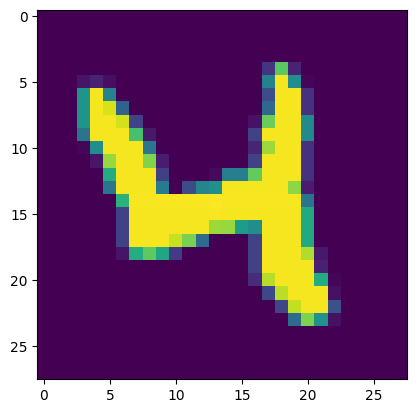

4


In [19]:
plt.imshow(X_train[20])
plt.show()

print(Y_train[20])

## unique values

In [23]:
print(np.unique(Y_train))
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## Scale the all values in the range of 0 to 1

In [24]:
X_train = X_train/255
X_test = X_test/255

In [27]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Build a Neural Network

In [29]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.3121 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1603 - accuracy: 0.9532
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1197 - accuracy: 0.9646
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0967 - accuracy: 0.9710
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0797 - accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0692 - accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0606 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0521 - accuracy: 0.9836
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss:

## Evaluate the model by check the test data accuracy

In [32]:
test_data_accur = model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0985 - accuracy: 0.9711


## Train_data_accuracy ===> 98.7%
## Test_data_accuracy ===> 97.1%

<function matplotlib.pyplot.show(close=None, block=None)>

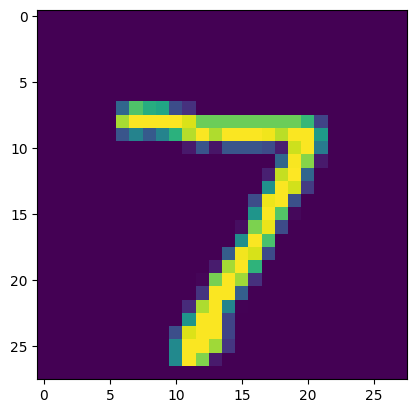

In [33]:
plt.imshow(X_test[0])
plt.show

In [34]:
print(Y_test[0])

7


In [35]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [36]:
print(Y_pred)

[[2.17754878e-02 6.30112991e-05 2.38731980e-01 ... 9.99991477e-01
  1.87536068e-02 1.20721191e-01]
 [1.41547203e-01 9.52498615e-01 9.99999702e-01 ... 1.30439531e-11
  9.51139092e-01 8.34595670e-10]
 [7.65361619e-05 9.97921407e-01 2.26815090e-01 ... 3.07483464e-01
  3.78963947e-01 1.33777047e-02]
 ...
 [1.45996433e-08 1.99705297e-09 4.05498140e-05 ... 8.23838055e-01
  6.16210938e-01 9.84825969e-01]
 [1.45646580e-03 1.06897996e-05 4.09707354e-05 ... 2.61885783e-04
  9.54508007e-01 5.35935840e-07]
 [5.66138700e-03 1.13950435e-07 6.63457438e-02 ... 1.38043987e-09
  1.76408415e-04 2.73608208e-07]]


## Y_pred = model.predict() gives the prediction probability of each class for that data point

### Converting the prediction label into class label

In [37]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


### Converting the prediction probabilities to class label for all test data points

In [39]:
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

# Confusion Matrix

In [41]:
conf_matr = confusion_matrix(Y_test,Y_pred_label)
print(conf_matr)

tf.Tensor(
[[ 955    1    1    1    1    3    8    3    7    0]
 [   0 1126    4    0    0    1    1    0    3    0]
 [   1    2 1001    2    7    2    2    5   10    0]
 [   0    0    6  979    0   13    0    4    6    2]
 [   1    0    2    1  951    3    6    3    2   13]
 [   1    0    0    5    4  873    3    2    3    1]
 [   3    3    0    1    5    6  936    0    4    0]
 [   0    4   11    4    4    0    0  994    4    7]
 [   0    1    4    7    6   10    1    3  940    2]
 [   3    4    1    8   14    9    1    7    6  956]], shape=(10, 10), dtype=int32)


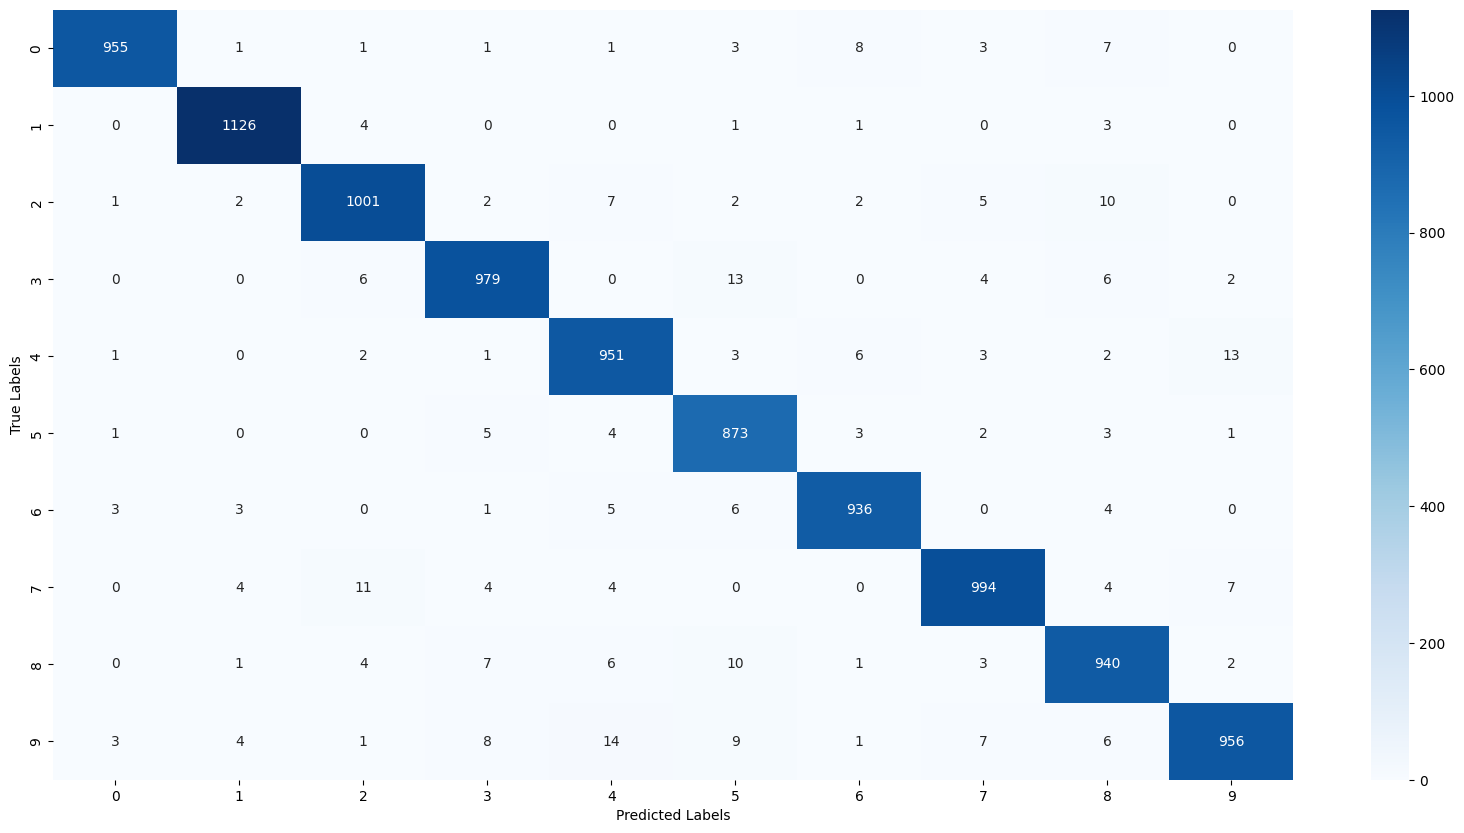

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(conf_matr,annot=True,fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Pre-Process the Image for Predictions

In [52]:
input_image_path = r'C:\Users\user.LAPTOP\Desktop\Deep Learning Projects\three.png'

In [62]:
input_image = load_img(input_image_path)

In [63]:
type(input_image)

PIL.PngImagePlugin.PngImageFile

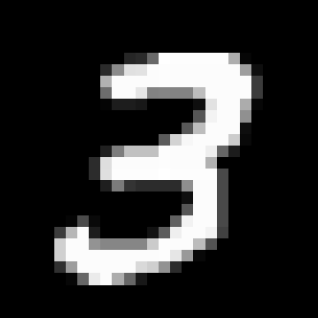

In [64]:
input_image

In [66]:
input_image_shape = img_to_array(input_image)

In [68]:
input_image_shape.shape

(318, 318, 3)

# Convert into RGB to GrayScale

In [71]:
img_path_for_grayscal = cv2.imread(r'C:\Users\user.LAPTOP\Desktop\Deep Learning Projects\three.png')

In [75]:
grayscle_img = cv2.cvtColor(img_path_for_grayscal,cv2.COLOR_RGB2GRAY)

In [77]:
grayscle_img.shape

(318, 318)

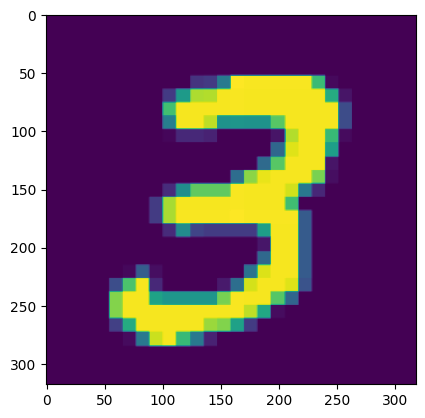

In [81]:
plt.imshow(grayscle_img)

# Reduce the dimension of the image

In [78]:
img_resize = cv2.resize(grayscle_img,(28,28))

In [79]:
img_resize.shape

(28, 28)

# Normalize the image

In [82]:
img_resize = img_resize/255

In [83]:
type(img_resize)

numpy.ndarray

# Reshape The images

In [84]:
img_resize = np.reshape(img_resize,[1,28,28])

In [85]:
prediction = model.predict(img_resize)
print(prediction)

1/1 [==============================] - 0s 134ms/step
[[8.0719917e-07 1.2734675e-04 3.4438960e-02 1.0000000e+00 1.2036471e-15
  7.4271701e-02 3.6323690e-14 8.1381630e-09 8.4320819e-01 9.5255601e-01]]


In [86]:
img_resize_label = np.argmax(prediction)

In [87]:
print(img_resize_label)

3


# Predictive System

Give Path of IMGC:\Users\user.LAPTOP\Desktop\Deep Learning Projects\three.png
1/1 [==============================] - 0s 47ms/step
The Handwritten Digit is recognised as  3


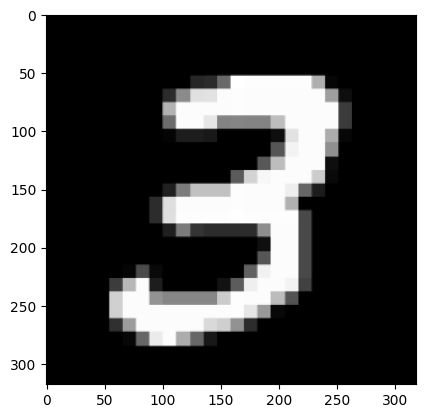

In [102]:
input_image_path = input('Give Path of IMG')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

grayscle_img = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)


img_resize = cv2.resize(grayscle_img,(28,28))


img_resize = img_resize/255

img_resize = np.reshape(img_resize,[1,28,28])

prediction = model.predict(img_resize)


img_resize_label = np.argmax(prediction)

print('The Handwritten Digit is recognised as ',img_resize_label)

#C:\Users\user.LAPTOP\Desktop\Deep Learning Projects\three.png